## California Housing Dataset Retrieval

In this section, we are fetching the California housing dataset using the `fetch_california_housing` function from the `sklearn.datasets` module. This dataset is commonly used for regression analysis and contains data on housing prices in various districts in California.

### Dataset Description:
The California housing dataset includes the following features:

- MedInc: Median income in the block.
- HouseAge: Median house age in the block.
- AveRooms: Average number of rooms.
- AveBedrms: Average number of bedrooms.
- Population: Block population.
- AveOccup: Average house occupancy.
- Latitude: Latitude of the block.
- Longitude: Longitude of the block.

Let's proceed with fetching the dataset.

In [37]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

## Data Processing: Creating the DataFrame

In this section, we are processing the fetched California housing dataset to create a pandas DataFrame for further analysis. We will utilize the pandas library for this task.

### Steps:
1. Import pandas library (`import pandas as pd`).
2. Create a DataFrame from the dataset.
3. Assign appropriate column names using the feature names provided in the dataset.
4. Add the target variable 'MedHouseVal' to the DataFrame.

Let's proceed with the data processing.

In [38]:
import pandas as pd

df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['MedHouseVal'] = data.target

## Displaying Initial Rows of the DataFrame

In this section, we are displaying the initial rows of the DataFrame `df` created from the California housing dataset. This will provide us with a preliminary understanding of the dataset's structure and the values it contains.

### Purpose:
- To visually inspect the first few rows of the DataFrame.
- To verify that the data loading and preprocessing steps have been performed correctly.

Let's proceed to display the initial rows of the DataFrame.

In [56]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Feature and Target Variable Extraction

In this section, we are extracting the features and the target variable from the DataFrame `df` created earlier. The features (`X`) represent the independent variables, while the target variable (`Y`) represents the dependent variable.

### Purpose:
- To separate the features and target variable for model training and evaluation.

### Steps:
1. Extract features by dropping the 'MedHouseVal' column from the DataFrame.
2. Extract the target variable by selecting only the 'MedHouseVal' column.

Let's proceed with the extraction process.

In [40]:
X = df.drop('MedHouseVal', axis=1)
Y = df.MedHouseVal

## Data Splitting: Train-Test Split

In this section, we are splitting the dataset into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module.

### Purpose:
- To divide the dataset into two subsets: one for training the model and the other for testing its performance.

### Steps:
1. Import the `train_test_split` function from the `sklearn.model_selection` module.
2. Split the data into training and testing sets, with a specified test size and random state.

Let's proceed with splitting the data.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Model Training: Linear Regression

In this section, we are training a Linear Regression model using the training data (`X_train` and `Y_train`). Linear Regression is a commonly used algorithm for regression tasks, especially when there is a linear relationship between the independent and dependent variables.

### Purpose:
- To create a predictive model that can estimate the target variable based on the features.

### Steps:
1. Import the `LinearRegression` class from the `sklearn.linear_model` module.
2. Create an instance of the Linear Regression model (`regressor`).
3. Fit the model to the training data (`X_train` and `Y_train`).

Let's proceed with training the Linear Regression model.

In [42]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, Y_train)

## Generating Predictions

In this section, we are generating predictions (`Y_pred`) using the trained Linear Regression model (`regressor`) on the testing features (`X_test`).

### Purpose:
- To predict the target variable values based on the features in the testing set.

### Steps:
- Use the trained model to predict the target variable values for the testing features.

Let's proceed with generating predictions.

In [43]:
Y_pred = regressor.predict(X_test)

## Mean Squared Error Calculation

In this section, we are calculating the mean squared error (MSE) between the true target variable values (`Y_test`) and the predicted target variable values (`Y_pred`).

### Purpose:
- To quantify the average squared difference between the predicted and actual values.

### Steps:
- Use the `mean_squared_error` function from `sklearn.metrics` to calculate the MSE.

Let's proceed with the MSE calculation.

In [44]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

0.5369686543372465

## Results Visualization

In this section, we are defining a function to visualize the predicted vs. actual values of the target variable using a scatter plot.

### Purpose:
- To visually assess the performance of the regression model.

### Function Description:
- `plot_results(Y_test, Y_pred)`: This function generates a scatter plot comparing the real values (`Y_test`) with the predicted values (`Y_pred`).

Let's proceed with visualizing the results.

In [52]:
import matplotlib.pyplot as plt

def plot_results(Y_test, Y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, Y_pred, color='blue')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title('California Housing Prices Prediction')
    plt.show()

## Visualization: Scatter Plot of Predicted vs. Actual Values (Sample)

In this section, we are visualizing a sample of predicted vs. actual values of the target variable using a scatter plot.

### Purpose:
- To visually assess the performance of the regression model on a subset of the testing data.

### Steps:
- Randomly select a sample of data points from the testing set.
- Plot the selected sample comparing the real values (`Y_test`) with the predicted values (`Y_pred`).

Let's proceed with visualizing the sample results.

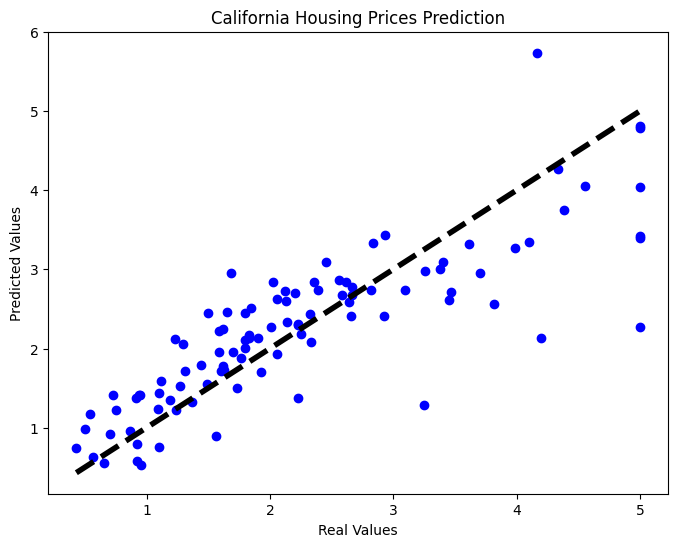

In [55]:
import random

sample_index = random.sample(range(len(Y_test)), 100)

test_sample = Y_test.iloc[sample_index]
pred_sample = [Y_pred[i] for i in sample_index]

plot_results(test_sample, pred_sample)